In [30]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import scripts

In [31]:
# load train and test set
dataset = pd.read_csv("heart_train.csv", sep = ",", low_memory = False)
#dataset = dataset.drop(columns=['Student_ID'])
test_set = pd.read_csv("heart_test.csv", sep = ",", low_memory = False)
#test_set = test_set.drop(columns=['Student_ID'])
dataset.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [32]:
# dimensions of dataset
print("#Train-samples = ", dataset.shape[0])
print("#Train-features = ", dataset.shape[1])
print("#Test-samples = ", test_set.shape[0])
print("#Test-features = ", test_set.shape[1])

#Train-samples =  868
#Train-features =  12
#Test-samples =  50
#Test-features =  12


In [33]:
# definition of preprocessor
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 12 
 Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Numerical features: 
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical features: 
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Dataset check

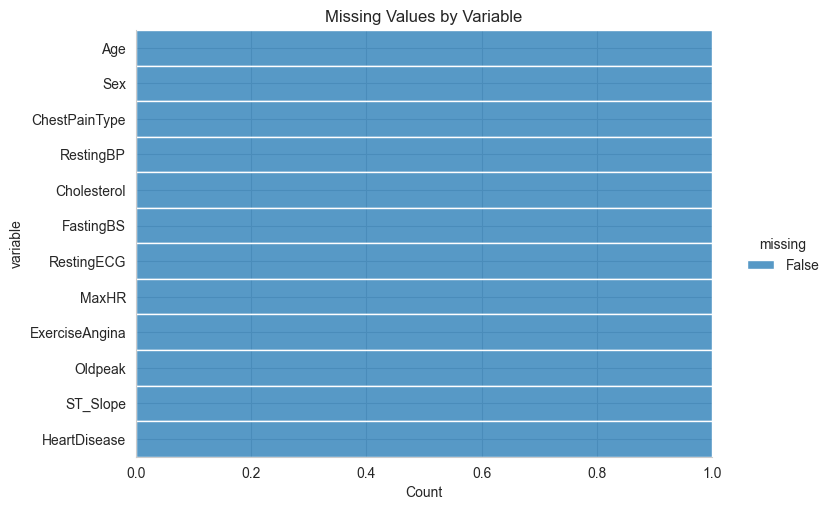

In [34]:
dp.filter_missing(dataset)

In [35]:
# проверка датасета


Exploratory Data Analysis

In [36]:
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 12 
 Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Numerical features: 
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical features: 
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


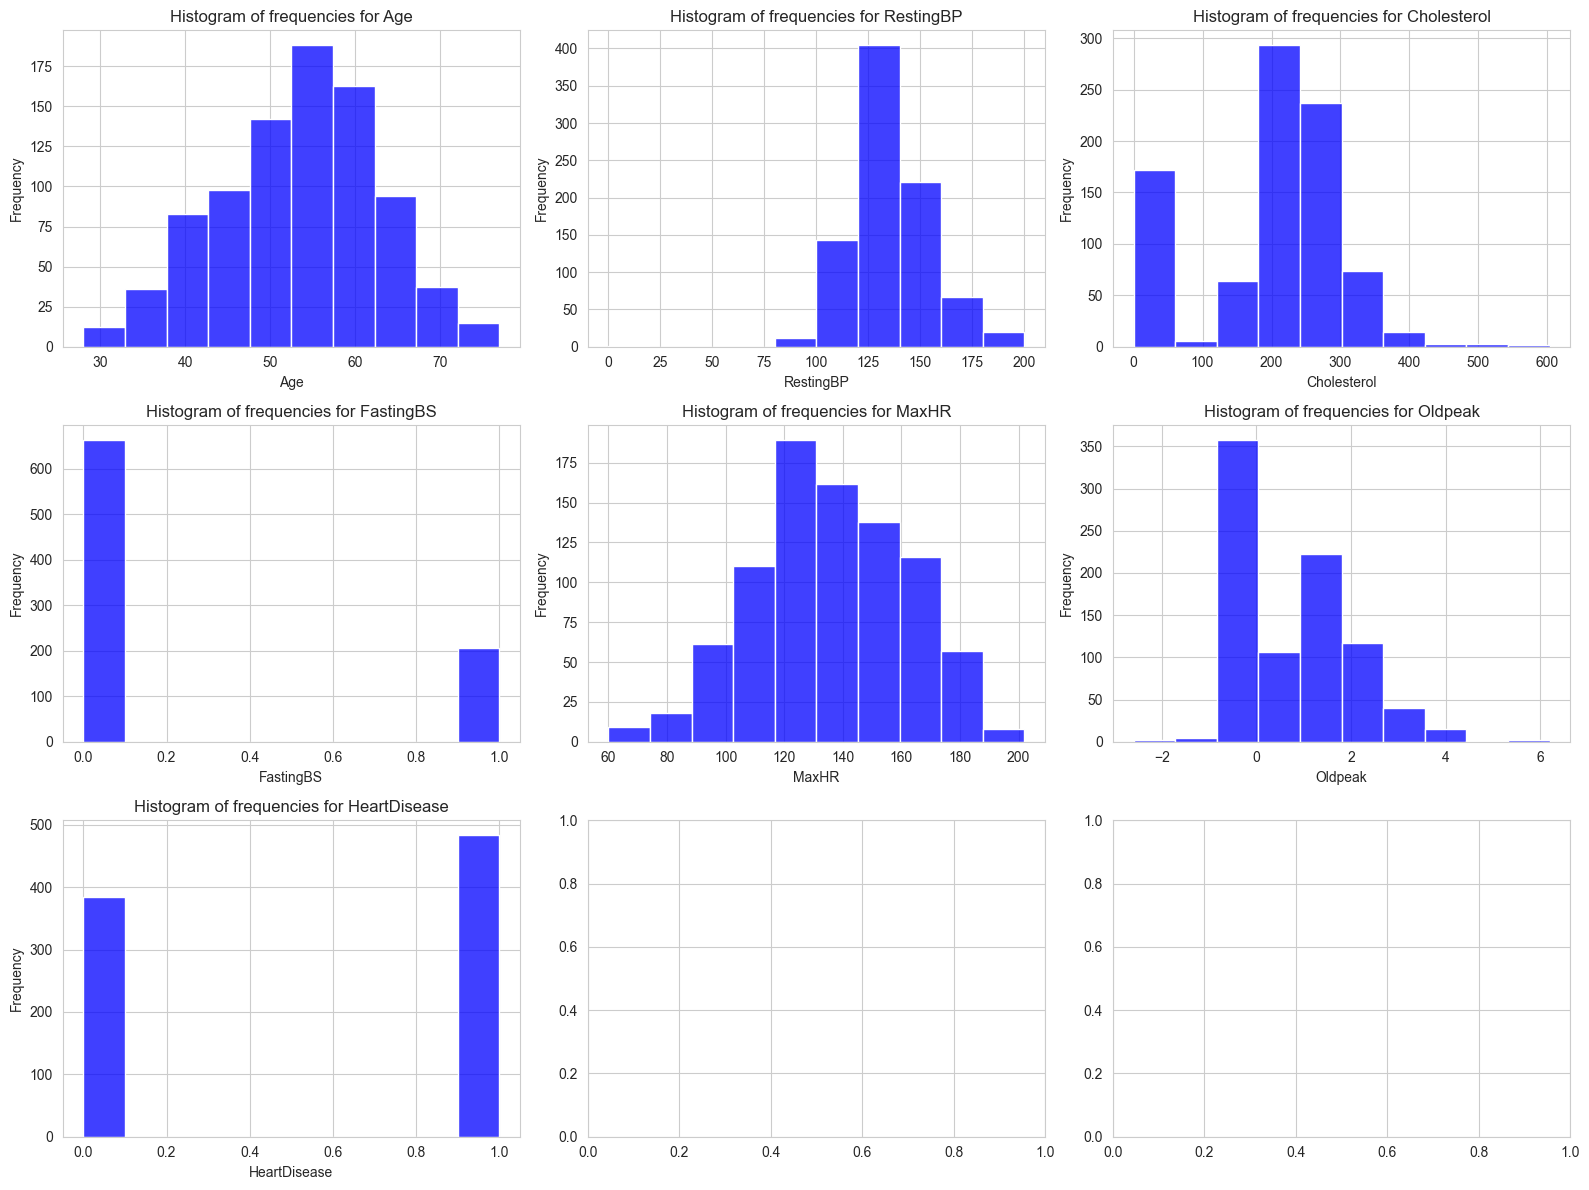

In [37]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 10)

In [38]:
# check the behavior of categorical features
dp.get_categorical_instances(dataset, cat_cols)


***** Sex ******
Sex
M    688
F    180
Name: count, dtype: int64

***** ChestPainType ******
ChestPainType
ASY    476
NAP    190
ATA    159
TA      43
Name: count, dtype: int64

***** RestingECG ******
RestingECG
Normal    519
ST        176
LVH       173
Name: count, dtype: int64

***** ExerciseAngina ******
ExerciseAngina
N    511
Y    357
Name: count, dtype: int64

***** ST_Slope ******
ST_Slope
Flat    435
Up      374
Down     59
Name: count, dtype: int64


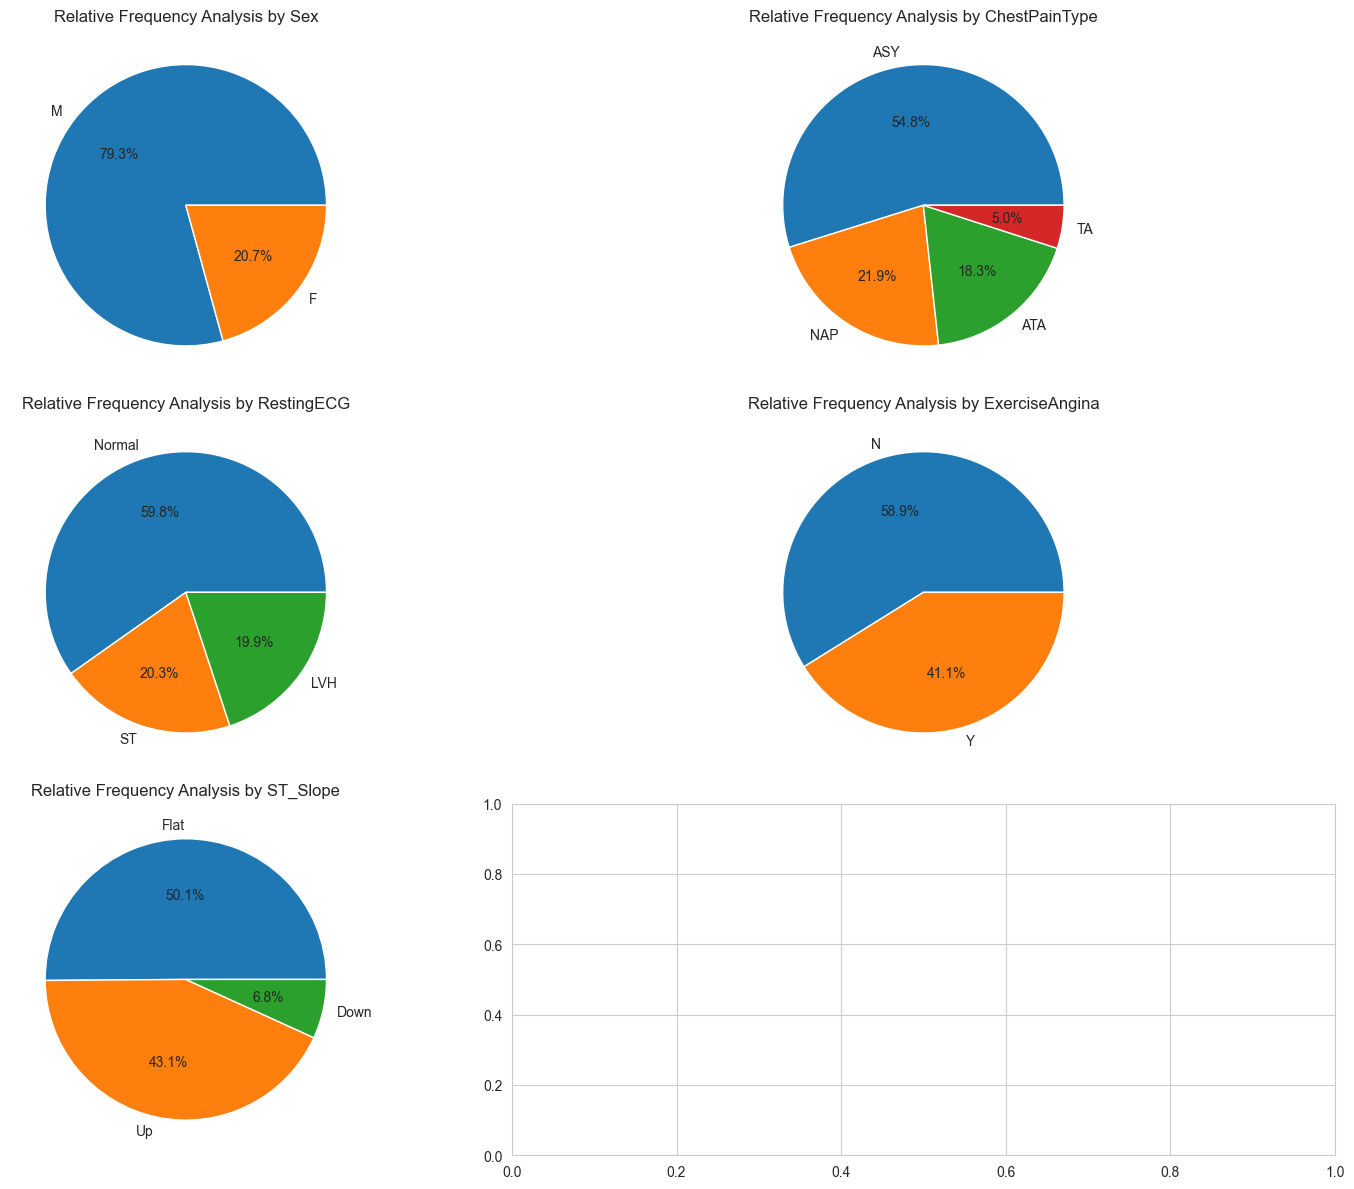

In [39]:
# iteratively pie chart
dp.iter_piechart(dataset, cat_cols)

Data preprocessing

In [40]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "HeartDisease"]
y = dataset["HeartDisease"]
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [41]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (868, 11)
Dimension of target =  (868,)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (694, 11)
Y-train:  694
X-test dim:  (174, 11)
Y-test:  174


In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(), ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]),  
    (RobustScaler(), []),
    (OneHotEncoder(handle_unknown="ignore"), ["ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "Sex"])    
)

In [44]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'RestingBP', 'Cholesterol',
                                  'FastingBS', 'MaxHR', 'Oldpeak']),
                                ('robustscaler', RobustScaler(), []),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope', 'Sex'])])

In [45]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [46]:
x_train

array([[-0.36128601,  0.63590914,  1.39507044, ...,  1.        ,
         0.        ,  1.        ],
       [-0.57855853,  0.9555911 ,  0.27095243, ...,  0.        ,
         1.        ,  0.        ],
       [-0.68719479,  0.42278783, -0.04232636, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.39916782, -0.21657608,  0.97122266, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15962165,  0.10310588,  0.6948002 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.68719479, -1.28218261,  0.41837774, ...,  1.        ,
         0.        ,  1.        ]])

In [47]:
y_train

522    1
39     0
264    1
247    1
18     1
      ..
835    1
192    0
629    0
559    1
684    1
Name: HeartDisease, Length: 694, dtype: int64

In [48]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  [0 1]


Building Models

KNN Classifier

In [49]:
%reload_ext autoreload
%autoreload 2

In [50]:
from scripts.classifiers import KNNModel
import time

# train model
sttrain_knn = time.time()
knn = KNNModel()
knn_model = knn.train(x_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

Best KNN Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Time of training KNN: 0.924 seconds


In [51]:
knn_model

KNeighborsClassifier(metric='manhattan')

In [52]:
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", knn_model.predict(x_test[0:10]))

real values in train:  [1 0 1 1 1 0 1 1 1 1]
predicted values in train:  [1 1 1 1 1 0 1 1 1 1]
real values in test:  [0 1 0 0 1 1 0 0 0 1]
predicted values in test:  [0 1 0 1 1 1 1 1 0 1]


In [53]:
# deploy knn model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

In [54]:
# evaluate knn model
from scripts.evaluator import EvalClassifier
rec_knn = DeployClassifier(path = "models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

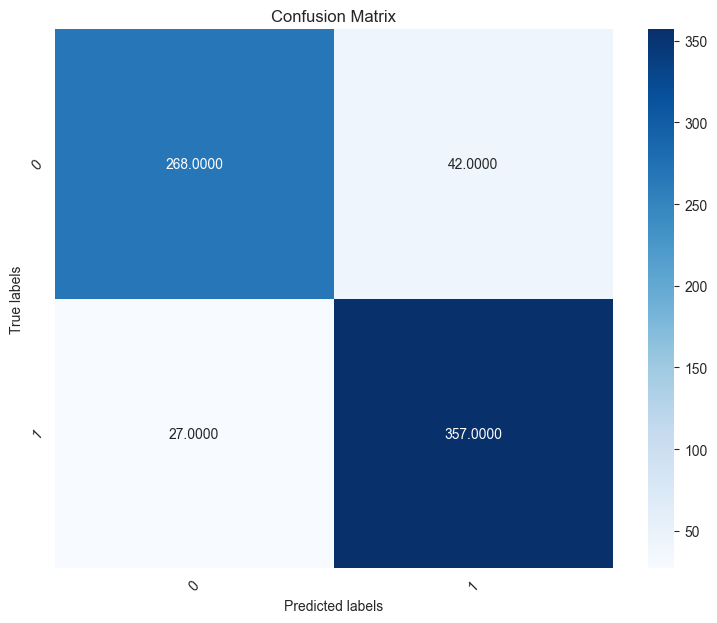

In [55]:
# get confusion matrix in training
y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

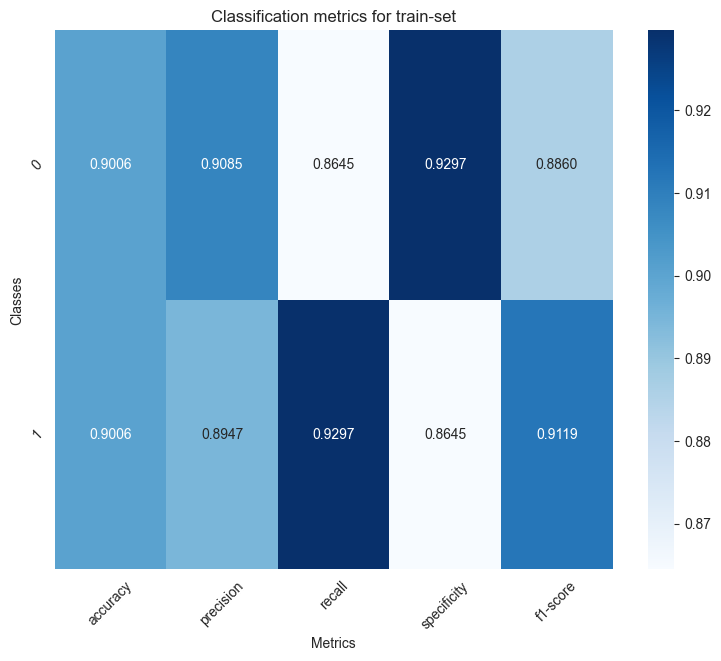

In [56]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

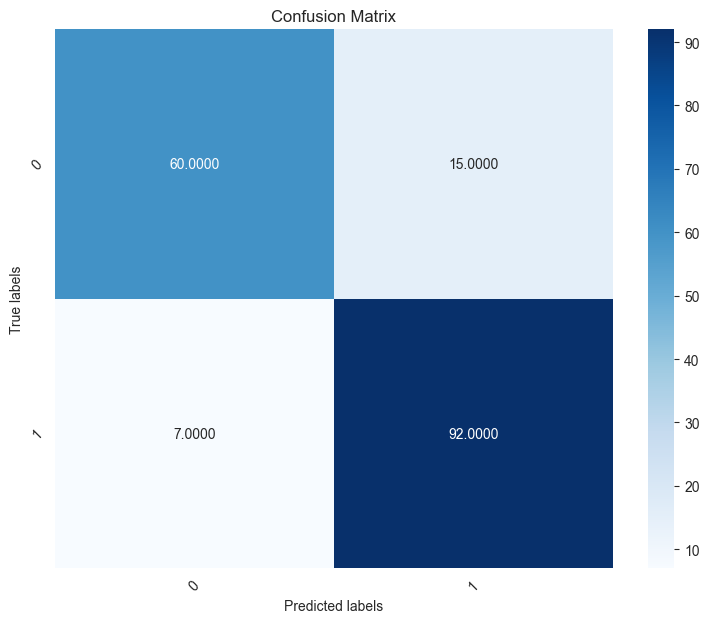

In [57]:
# get confusion matrix in testing
y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

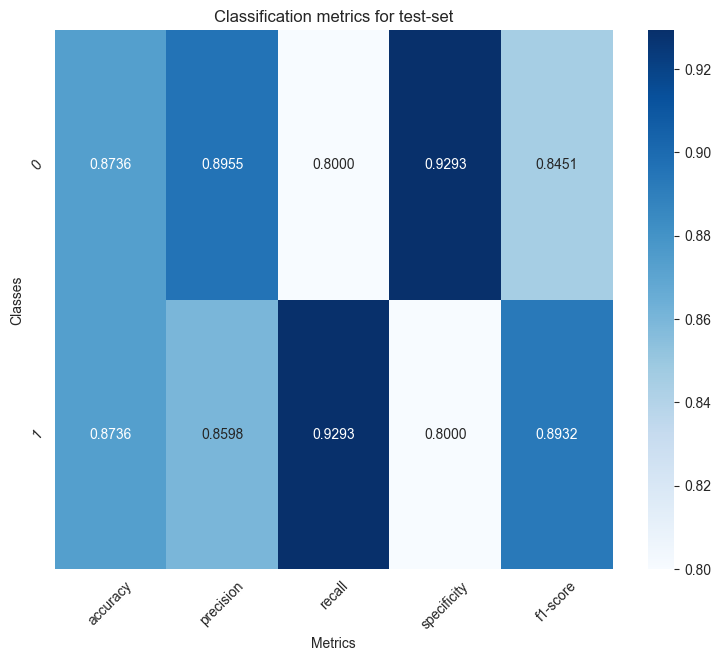

In [58]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

In [59]:
# calculate the metrics for whole test set
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.873563,0.877668,0.864646,0.864646,0.869137


SVM Classifier

In [60]:
from scripts.classifiers import SVMModel
import time

# train model
sttrain_svm = time.time()
svm = SVMModel()
svm_model = svm.train(x_train, y_train)

# calculate time
ettrain_svm = time.time()
ttrain_svm = ettrain_svm - sttrain_svm
print(f"Time of training SVM: {ttrain_svm:.3f} seconds")

Best SVM Parameters: {'C': 1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Time of training SVM: 1.112 seconds


In [61]:
svm_model

SVC(C=1, class_weight='balanced', degree=2, kernel='poly')

In [62]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", svm_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", svm_model.predict(x_test[0:10]))

real values in train:  [1 0 1 1 1 0 1 1 1 1]
predicted values in train:  [1 1 1 1 1 0 1 1 1 1]
real values in test:  [0 1 0 0 1 1 0 0 0 1]
predicted values in test:  [0 1 0 1 1 1 1 1 0 1]


In [63]:
# deploy svm model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

In [64]:
# evaluate svm model
from scripts.evaluator import EvalClassifier
rec_svm = DeployClassifier(path = "models").load_model(filename="svm_v1.pkl")
eval_svm = EvalClassifier(model = rec_svm)

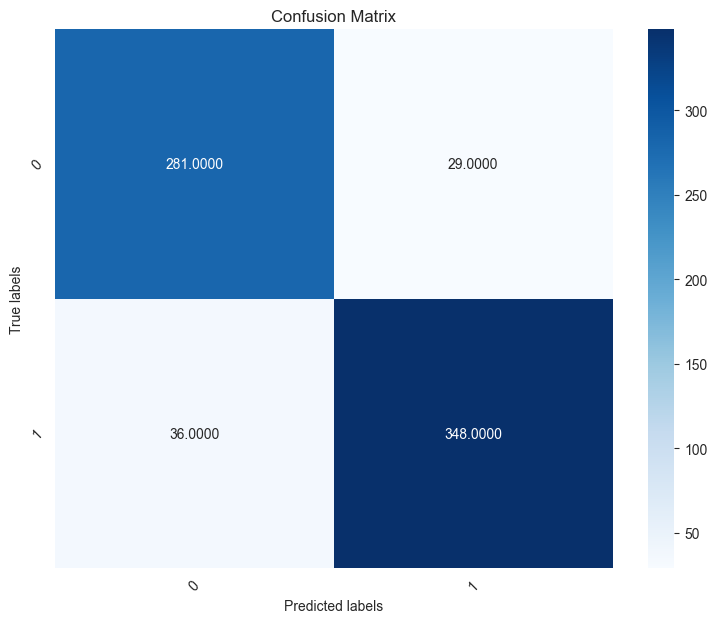

In [65]:
# get confusion matrix in training
y_pred = rec_svm.predict(x_train)
cmsvm_train = eval_svm.get_confusion_matrix(y_train.values, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_train, classes)

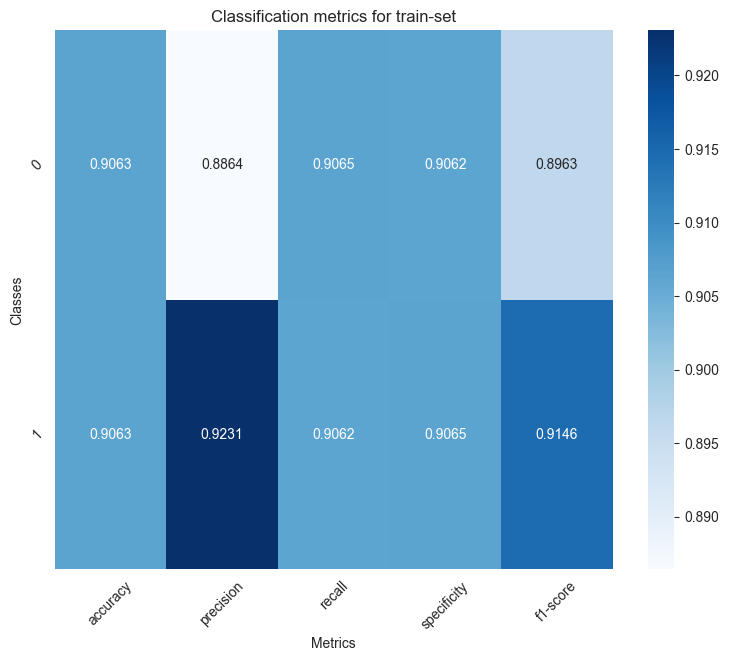

In [66]:
metrics_train_svm = eval_svm.calculate_metrics_by_class(cmsvm_train, classes)
eval_svm.plot_metrics_by_class(metrics_train_svm, "Classification metrics for train-set")

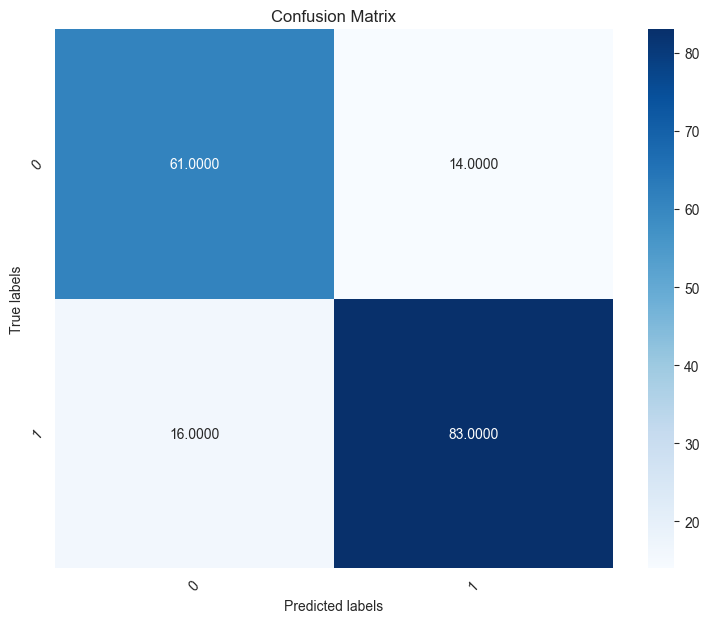

In [68]:
# get confusion matrix in testing
y_pred = rec_svm.predict(x_test)
cmsvm_test = eval_svm.get_confusion_matrix(y_test, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_test, classes)

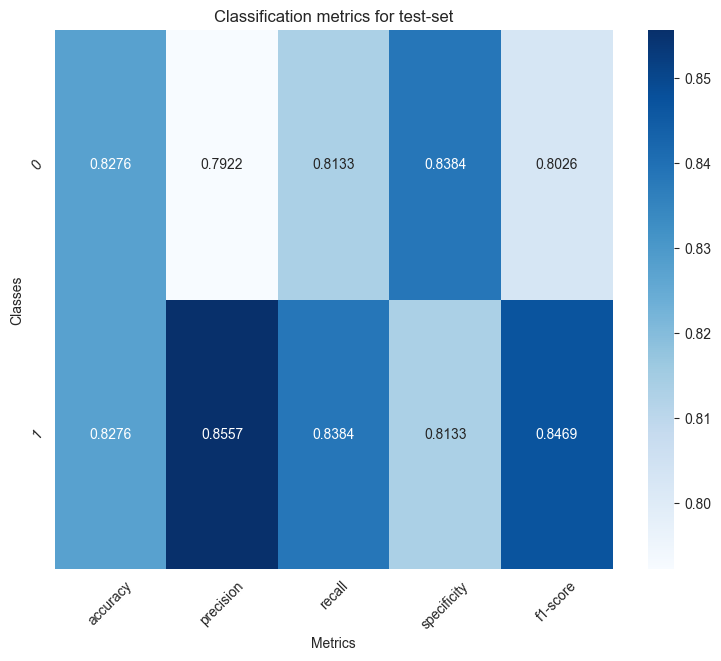

In [69]:
metrics_test_svm = eval_svm.calculate_metrics_by_class(cmsvm_test, classes)
eval_svm.plot_metrics_by_class(metrics_test_svm, "Classification metrics for test-set")

In [70]:
# calculate the metrics for whole test set
eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.827586,0.823939,0.825859,0.825859,0.824785


Random Forest Classifier

In [71]:
from scripts.classifiers import RandomForestModel
import time

# train model
sttrain_rf = time.time()
rf = RandomForestModel()
rf_model = rf.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

Best Random Forest Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 20}
Time of training Random Forest: 8.682 seconds


C:\Users\Dim\PycharmProjects\newpython2\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [72]:
rf_model

RandomForestClassifier(max_depth=30, min_samples_split=20, n_estimators=20)

In [73]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", rf_model.predict(x_test[0:10]))

real values in train:  [1 0 1 1 1 0 1 1 1 1]
predicted values in train:  [1 1 1 1 1 0 1 1 1 1]
real values in test:  [0 1 0 0 1 1 0 0 0 1]
predicted values in test:  [0 1 0 1 1 1 1 1 0 1]


In [74]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=rf_model)

In [75]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_rf = DeployClassifier(path = "models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

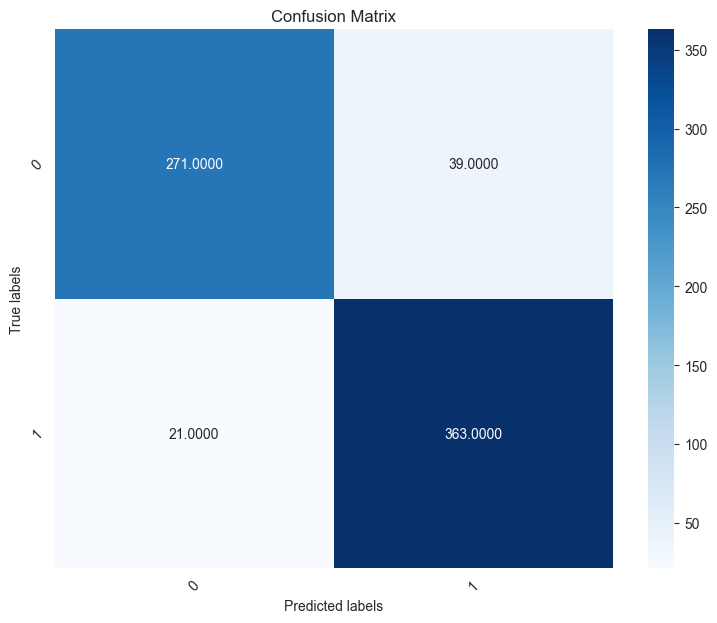

In [76]:
# get confusion matrix in training
y_pred = rec_rf.predict(x_train)
cmrf_train = eval_rf.get_confusion_matrix(y_train.values, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_train, classes)

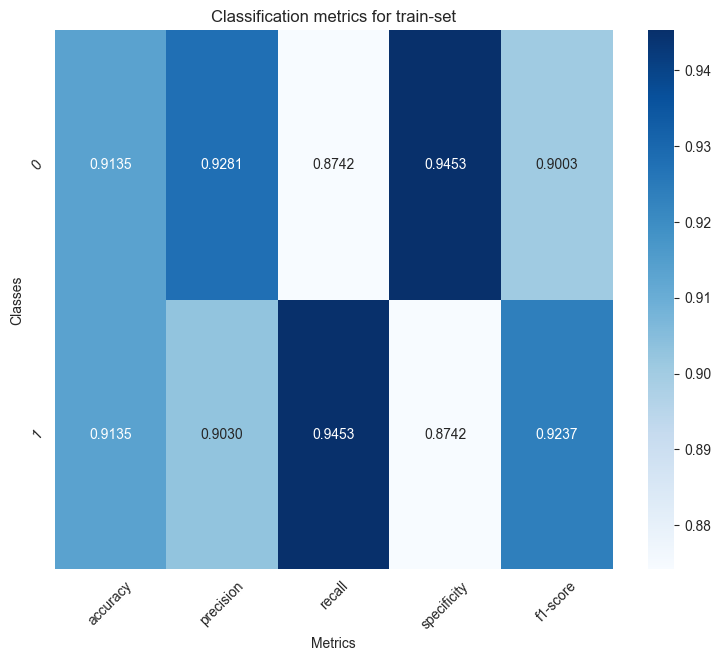

In [77]:
metrics_train_rf = eval_knn.calculate_metrics_by_class(cmrf_train, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

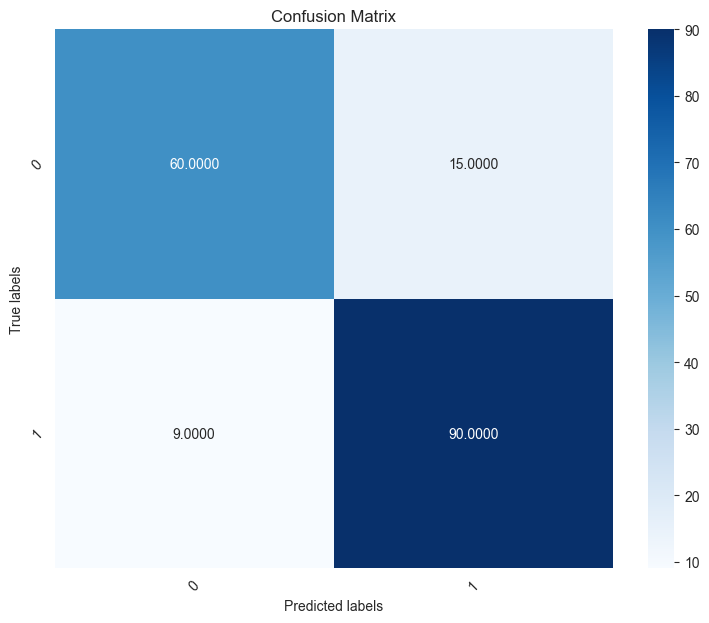

In [79]:
# get confusion matrix in testing
y_pred = rec_rf.predict(x_test)
cmrf_test = eval_rf.get_confusion_matrix(y_test, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_test, classes)

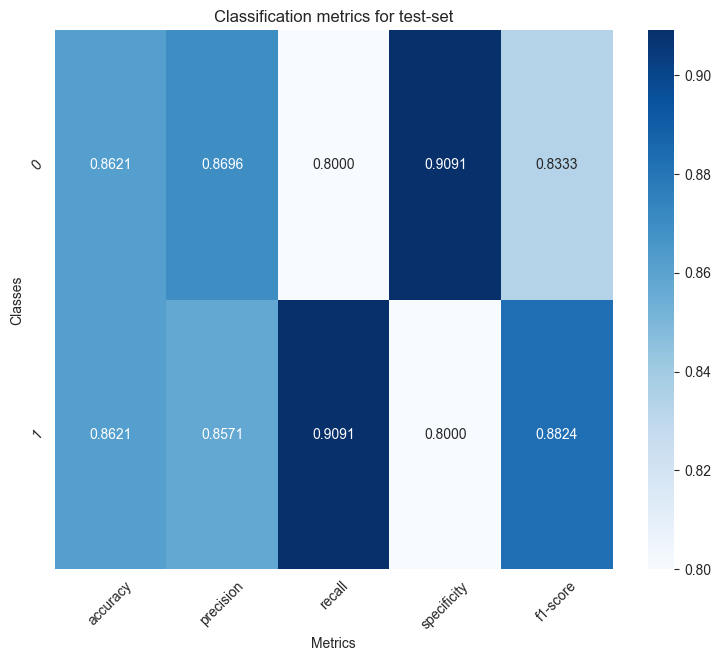

In [80]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

In [81]:
# calculate the metrics for whole test set
eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.862069,0.863354,0.854545,0.854545,0.857843
